# moons - non linear dataset 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.manifold import TSNE

In [37]:
X,y = make_moons(n_samples=10000,noise=0.1,random_state=42)

num_extra_features = 8
extra_features = np.random.normal(scale=0.1,size=(X.shape[0],num_extra_features))  
X_extended = np.hstack((X,extra_features))

df_moons = pd.DataFrame(X_extended,columns=[f"vab_{i+1}" for i in range(X_extended.shape[1])])
df_moons["target"] = y

In [38]:
df_moons

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target
0,0.455493,-0.125503,0.038190,0.055688,-0.021515,-0.125640,-0.035053,-0.041168,-0.129623,-0.149328,1
1,-0.704217,0.041308,0.104097,0.096566,-0.151889,0.011416,-0.066270,0.075509,-0.008285,-0.023126,0
2,0.413799,0.791322,-0.055166,-0.022240,-0.136471,0.055090,0.067747,-0.133715,0.167076,0.026659,0
3,-0.864049,0.138754,0.033756,0.004952,-0.107315,0.065852,0.037587,0.069115,-0.180435,-0.203619,0
4,-0.936268,0.359267,0.012510,-0.043746,-0.176028,-0.007335,0.079860,0.006272,0.193863,0.072204,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.100828,-0.046548,-0.270553,0.011539,-0.120881,0.124382,0.043446,-0.131446,1
9996,0.052471,0.474023,-0.130659,-0.152188,0.018282,-0.060226,0.049418,-0.183995,-0.013695,0.019417,1
9997,-0.038031,0.245408,0.180198,-0.009502,0.023415,0.060556,-0.002431,0.202986,0.162574,-0.042126,1
9998,0.869802,0.523295,-0.064327,0.040480,-0.083759,0.045870,-0.039352,-0.080847,0.109214,0.011979,0


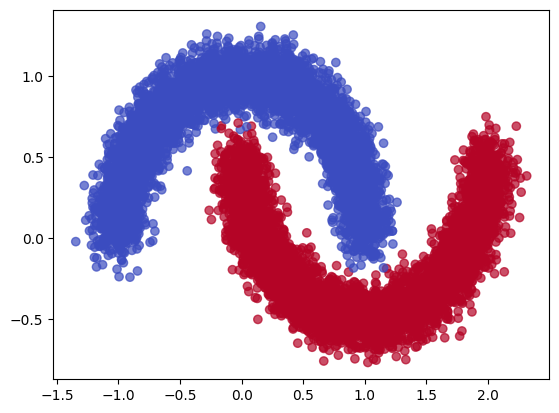

In [39]:
plt.scatter(df_moons.iloc[:,0],df_moons.iloc[:, 1],c=y,cmap='coolwarm',alpha=0.7)
plt.show()

In [40]:
df_moons

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target
0,0.455493,-0.125503,0.038190,0.055688,-0.021515,-0.125640,-0.035053,-0.041168,-0.129623,-0.149328,1
1,-0.704217,0.041308,0.104097,0.096566,-0.151889,0.011416,-0.066270,0.075509,-0.008285,-0.023126,0
2,0.413799,0.791322,-0.055166,-0.022240,-0.136471,0.055090,0.067747,-0.133715,0.167076,0.026659,0
3,-0.864049,0.138754,0.033756,0.004952,-0.107315,0.065852,0.037587,0.069115,-0.180435,-0.203619,0
4,-0.936268,0.359267,0.012510,-0.043746,-0.176028,-0.007335,0.079860,0.006272,0.193863,0.072204,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.100828,-0.046548,-0.270553,0.011539,-0.120881,0.124382,0.043446,-0.131446,1
9996,0.052471,0.474023,-0.130659,-0.152188,0.018282,-0.060226,0.049418,-0.183995,-0.013695,0.019417,1
9997,-0.038031,0.245408,0.180198,-0.009502,0.023415,0.060556,-0.002431,0.202986,0.162574,-0.042126,1
9998,0.869802,0.523295,-0.064327,0.040480,-0.083759,0.045870,-0.039352,-0.080847,0.109214,0.011979,0


### correlation matrix

In [41]:
df_moons.iloc[:,:-1].corr()

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10
vab_1,1.000000,-0.436503,-0.004394,-0.001318,-0.006318,0.001498,-0.006780,0.000783,-0.008667,0.000127
vab_2,-0.436503,1.000000,0.003921,-0.013441,0.010467,0.008136,-0.004889,-0.006108,0.009902,0.010005
vab_3,-0.004394,0.003921,1.000000,-0.001880,-0.006599,-0.015667,-0.012078,-0.001791,0.002480,-0.002011
vab_4,-0.001318,-0.013441,-0.001880,1.000000,0.017309,0.003071,0.002665,0.002004,-0.014185,-0.001150
vab_5,-0.006318,0.010467,-0.006599,0.017309,1.000000,-0.003129,0.001909,0.003190,0.020761,-0.003072
vab_6,0.001498,0.008136,-0.015667,0.003071,-0.003129,1.000000,-0.017671,-0.000990,-0.005784,-0.012075
vab_7,-0.006780,-0.004889,-0.012078,0.002665,0.001909,-0.017671,1.000000,-0.001225,0.010231,-0.002594
vab_8,0.000783,-0.006108,-0.001791,0.002004,0.003190,-0.000990,-0.001225,1.000000,0.002800,-0.006854
vab_9,-0.008667,0.009902,0.002480,-0.014185,0.020761,-0.005784,0.010231,0.002800,1.000000,0.002377
vab_10,0.000127,0.010005,-0.002011,-0.001150,-0.003072,-0.012075,-0.002594,-0.006854,0.002377,1.000000


<Axes: >

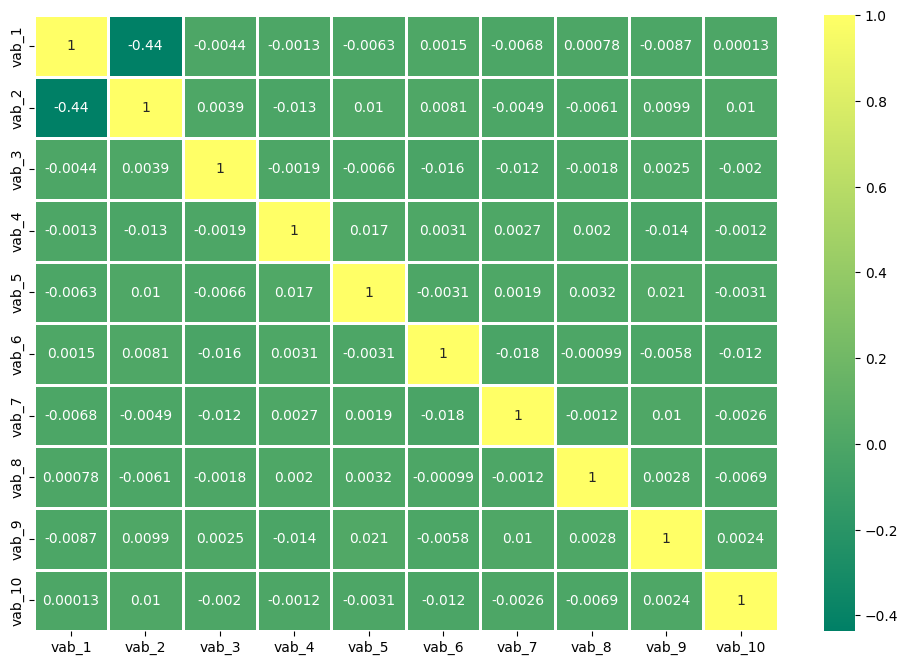

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(df_moons.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',linewidths=1)

### data standardization

In [43]:
X_values = df_moons.iloc[:,:-1].values

In [44]:
y_values = df_moons.iloc[:,-1].values

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
X_values = scaler.fit_transform(X_values)

In [48]:
np.mean(X_values),np.std(X_values)

(6.188827228470473e-17, 1.0000000000000002)

In [49]:
pd.DataFrame(X_values)

,0,1,2,3,4,5,6,7,8,9
0,-0.052391,-0.745451,0.381796,0.544771,-0.224940,-1.261388,-0.353809,-0.405591,-1.298447,-1.496102
1,-1.383186,-0.413818,1.042029,0.951815,-1.525932,0.114964,-0.662458,0.751474,-0.086004,-0.231756
2,-0.100236,1.077265,-0.553410,-0.231210,-1.372076,0.553560,0.662606,-1.323367,1.666246,0.267015
3,-1.566596,-0.220089,0.337374,0.039561,-1.081127,0.661631,0.364399,0.688070,-1.806174,-2.040012
4,-1.649469,0.218309,0.124546,-0.445356,-1.766808,-0.073340,0.782364,0.064865,1.933912,0.723299
...,...,...,...,...,...,...,...,...,...,...
9995,-0.368628,-0.220491,1.009279,-0.473264,-2.710065,0.116208,-1.202409,1.236147,0.430902,-1.316949
9996,-0.514868,0.446451,-1.309672,-1.525184,0.172189,-0.604484,0.481375,-1.821985,-0.140066,0.194462
9997,-0.618722,-0.008052,1.804386,-0.104370,0.223419,0.608452,-0.031263,2.015648,1.621264,-0.422104
9998,0.423039,0.544407,-0.645184,0.393337,-0.846069,0.460968,-0.396310,-0.799089,1.088075,0.119940


## pca application

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca_general = PCA()

In [52]:
pca_general.fit(X_values)

PCA()

In [53]:
explained_variance = pca_general.explained_variance_ratio_

In [54]:
explained_variance

array([0.14377029, 0.10306054, 0.10240127, 0.10091256, 0.10079596,
       0.10024518, 0.09948894, 0.0971733 , 0.09587034, 0.05628162])

In [55]:
eigenvalues = pca_general.explained_variance_

In [56]:
pd.DataFrame(eigenvalues)

,0
0,1.437847
1,1.030708
2,1.024115
3,1.009227
4,1.008060
5,1.002552
6,0.994989
7,0.971830
8,0.958799
9,0.562872


In [57]:
eigenvectors = pca_general.components_

### scree plot

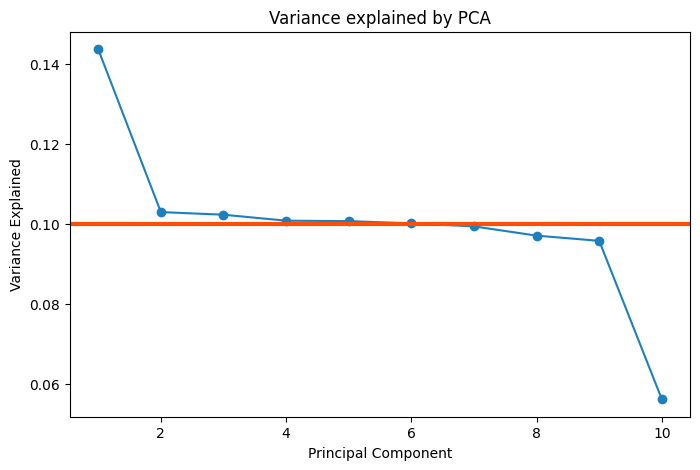

In [58]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [59]:
pca = PCA(n_components=2)

In [60]:
principal_components = pca.fit_transform(X_values)

In [61]:
pd.DataFrame(principal_components).head(8)

,0,1
0,-0.574641,-0.588052
1,0.620965,-1.097336
2,0.870834,0.291643
3,0.833435,-1.852253
4,1.354412,0.780424
5,-0.535010,-1.035421
6,-0.359749,1.342005
7,0.627768,0.429979


In [62]:
principal_df = pd.DataFrame(data=principal_components,columns=['principal component 1','principal component 2'])

In [63]:
final_df = pd.concat([principal_df,df_moons[['target']]],axis=1)

In [64]:
final_df

,principal component 1,principal component 2,target
0,-0.574641,-0.588052,1
1,0.620965,-1.097336,0
2,0.870834,0.291643,0
3,0.833435,-1.852253,0
4,1.354412,0.780424,0
...,...,...,...
9995,0.028952,-1.685655,1
9996,0.711483,0.418291,1
9997,0.490283,0.757851,1
9998,0.095420,-0.228028,0


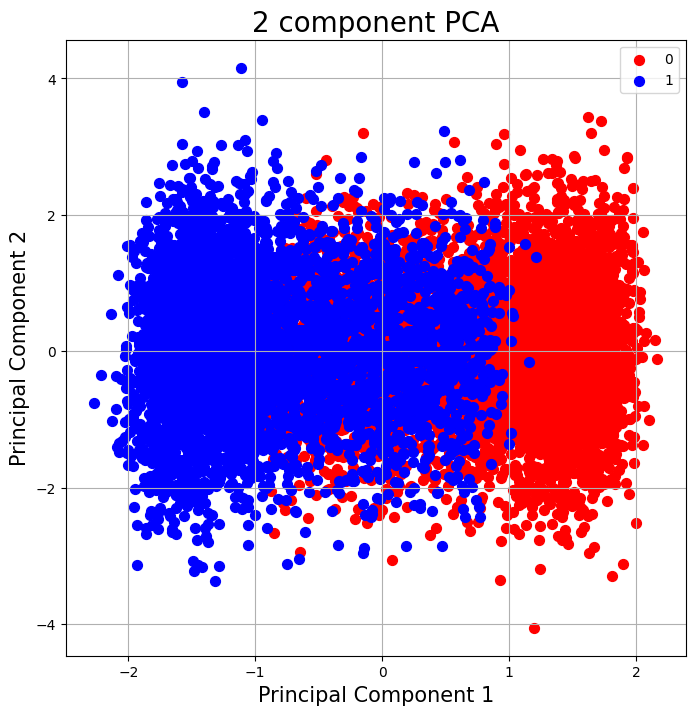

In [65]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

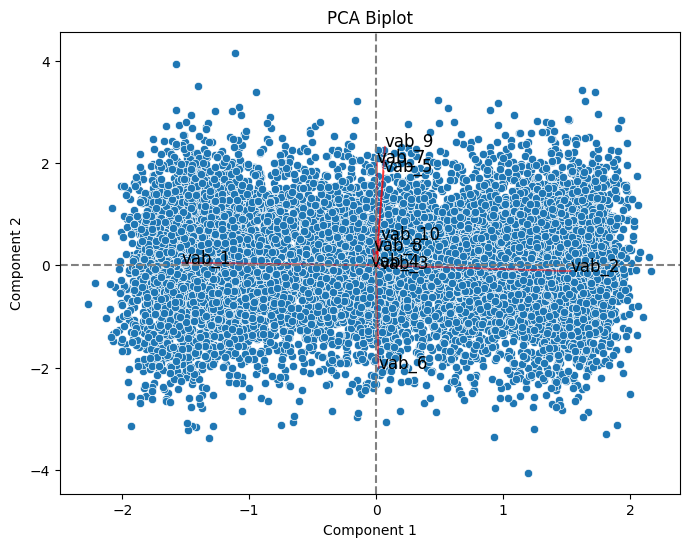

In [66]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_moons.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

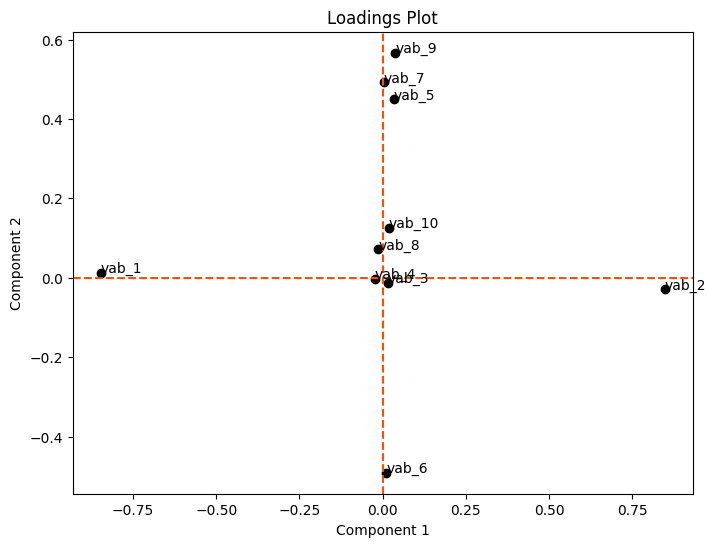

In [67]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_moons.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [68]:
scores_pca = pca.transform(X_values)

In [69]:
pd.DataFrame(scores_pca).head()

,0,1
0,-0.574641,-0.588052
1,0.620965,-1.097336
2,0.870834,0.291643
3,0.833435,-1.852253
4,1.354412,0.780424


## t-SNE

In [70]:
tsne = TSNE(n_components=2,random_state=42)

In [71]:
X_tsne = tsne.fit_transform(X_values)

In [72]:
tsne_data = np.vstack((X_tsne.T,df_moons['target'])).T

In [73]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [74]:
tsne_df

,dim_1,dim_2,target
0,-19.807575,50.235878,1.0
1,66.596695,0.441697,0.0
2,20.231262,-18.117355,0.0
3,16.381172,40.527908,0.0
4,60.316490,7.967040,0.0
...,...,...,...
9995,-5.071754,6.785550,1.0
9996,27.342527,12.646630,1.0
9997,-11.515995,16.643707,1.0
9998,7.507464,-31.549768,0.0


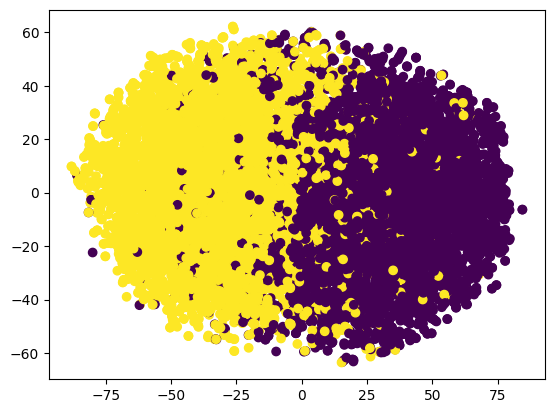

In [75]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [76]:
tsne.kl_divergence_

3.2348735332489014

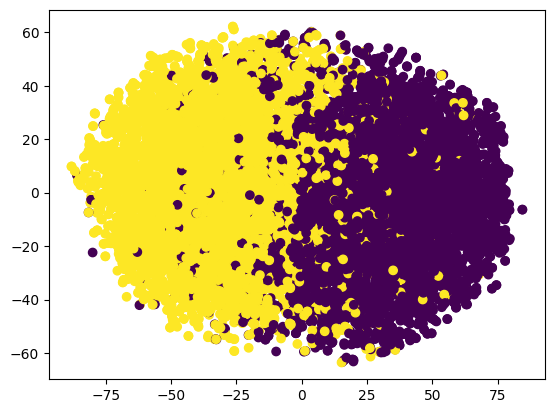

In [77]:
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=y)
plt.show()

## clustering 

In [78]:
from sklearn.cluster import KMeans

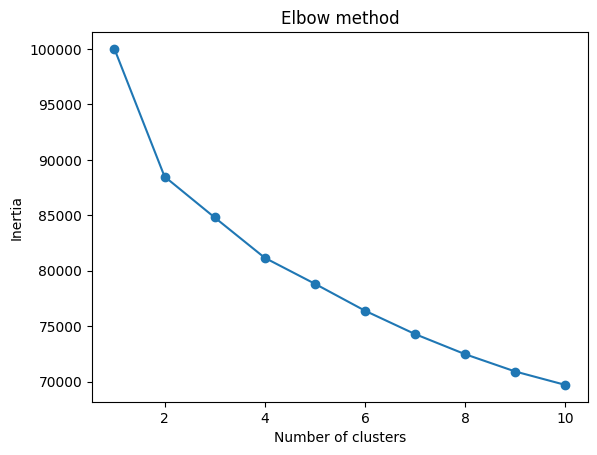

In [79]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [80]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [81]:
kmeans.fit(X_values)

KMeans(n_clusters=2, random_state=42)

In [82]:
df_moons['k_means'] = kmeans.labels_

In [83]:
df_moons

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means
0,0.455493,-0.125503,0.038190,0.055688,-0.021515,-0.125640,-0.035053,-0.041168,-0.129623,-0.149328,1,1
1,-0.704217,0.041308,0.104097,0.096566,-0.151889,0.011416,-0.066270,0.075509,-0.008285,-0.023126,0,0
2,0.413799,0.791322,-0.055166,-0.022240,-0.136471,0.055090,0.067747,-0.133715,0.167076,0.026659,0,0
3,-0.864049,0.138754,0.033756,0.004952,-0.107315,0.065852,0.037587,0.069115,-0.180435,-0.203619,0,0
4,-0.936268,0.359267,0.012510,-0.043746,-0.176028,-0.007335,0.079860,0.006272,0.193863,0.072204,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.100828,-0.046548,-0.270553,0.011539,-0.120881,0.124382,0.043446,-0.131446,1,0
9996,0.052471,0.474023,-0.130659,-0.152188,0.018282,-0.060226,0.049418,-0.183995,-0.013695,0.019417,1,0
9997,-0.038031,0.245408,0.180198,-0.009502,0.023415,0.060556,-0.002431,0.202986,0.162574,-0.042126,1,0
9998,0.869802,0.523295,-0.064327,0.040480,-0.083759,0.045870,-0.039352,-0.080847,0.109214,0.011979,0,0


In [84]:
from scipy.optimize import linear_sum_assignment

y_true = df_moons['target'].values  
y_kmeans = df_moons['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_moons['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_moons['k_means'] == y_true))

accuracy before: 0.8492
accuracy after: 0.8492


In [85]:
df_moons

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means
0,0.455493,-0.125503,0.038190,0.055688,-0.021515,-0.125640,-0.035053,-0.041168,-0.129623,-0.149328,1,1
1,-0.704217,0.041308,0.104097,0.096566,-0.151889,0.011416,-0.066270,0.075509,-0.008285,-0.023126,0,0
2,0.413799,0.791322,-0.055166,-0.022240,-0.136471,0.055090,0.067747,-0.133715,0.167076,0.026659,0,0
3,-0.864049,0.138754,0.033756,0.004952,-0.107315,0.065852,0.037587,0.069115,-0.180435,-0.203619,0,0
4,-0.936268,0.359267,0.012510,-0.043746,-0.176028,-0.007335,0.079860,0.006272,0.193863,0.072204,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.100828,-0.046548,-0.270553,0.011539,-0.120881,0.124382,0.043446,-0.131446,1,0
9996,0.052471,0.474023,-0.130659,-0.152188,0.018282,-0.060226,0.049418,-0.183995,-0.013695,0.019417,1,0
9997,-0.038031,0.245408,0.180198,-0.009502,0.023415,0.060556,-0.002431,0.202986,0.162574,-0.042126,1,0
9998,0.869802,0.523295,-0.064327,0.040480,-0.083759,0.045870,-0.039352,-0.080847,0.109214,0.011979,0,0


In [86]:
print(np.unique(df_moons['target']))

[0 1]


In [87]:
print(np.unique(kmeans.labels_))

[0 1]


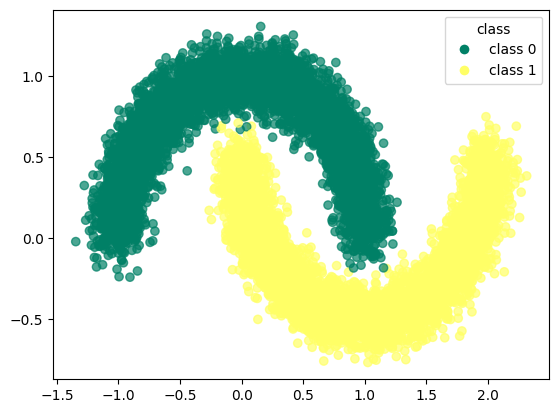

In [88]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_moons['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                        for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

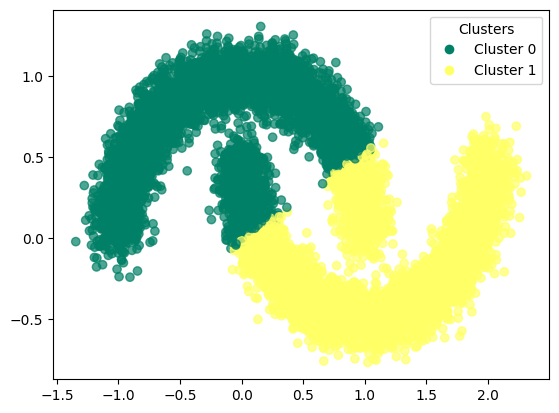

In [89]:
scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['k_means'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_moons['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [90]:
kmeans.cluster_centers_

array([[-0.73606452,  0.78386496,  0.00237975, -0.00601102,  0.01373329,
         0.00834923,  0.0077567 , -0.01139892,  0.01654596, -0.00222283],
       [ 0.73224691, -0.77979943, -0.0023674 ,  0.00597984, -0.01366206,
        -0.00830593, -0.00771647,  0.0113398 , -0.01646014,  0.0022113 ]])

In [91]:
print(confusion_matrix(df_moons['target'],df_moons['k_means']))

[[4240  760]
 [ 748 4252]]


In [92]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5000
           1       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### clustering with pca

In [93]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++")
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

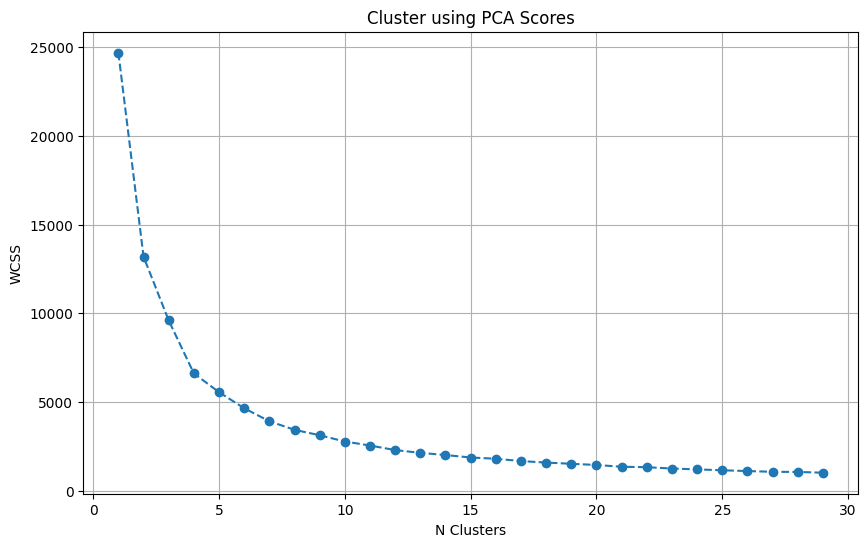

In [94]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [95]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [96]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [97]:
df_pca_kmeans = df_moons.copy()

In [98]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [99]:
df_pca_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_pca
0,0.455493,-0.125503,0.038190,0.055688,-0.021515,-0.125640,-0.035053,-0.041168,-0.129623,-0.149328,1,1,1
1,-0.704217,0.041308,0.104097,0.096566,-0.151889,0.011416,-0.066270,0.075509,-0.008285,-0.023126,0,0,0
2,0.413799,0.791322,-0.055166,-0.022240,-0.136471,0.055090,0.067747,-0.133715,0.167076,0.026659,0,0,0
3,-0.864049,0.138754,0.033756,0.004952,-0.107315,0.065852,0.037587,0.069115,-0.180435,-0.203619,0,0,0
4,-0.936268,0.359267,0.012510,-0.043746,-0.176028,-0.007335,0.079860,0.006272,0.193863,0.072204,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.100828,-0.046548,-0.270553,0.011539,-0.120881,0.124382,0.043446,-0.131446,1,0,0
9996,0.052471,0.474023,-0.130659,-0.152188,0.018282,-0.060226,0.049418,-0.183995,-0.013695,0.019417,1,0,0
9997,-0.038031,0.245408,0.180198,-0.009502,0.023415,0.060556,-0.002431,0.202986,0.162574,-0.042126,1,0,0
9998,0.869802,0.523295,-0.064327,0.040480,-0.083759,0.045870,-0.039352,-0.080847,0.109214,0.011979,0,0,0


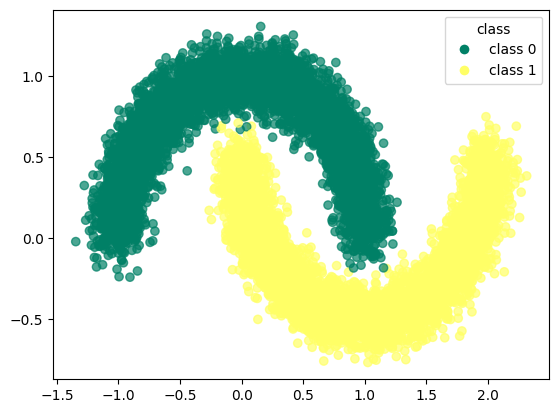

In [100]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

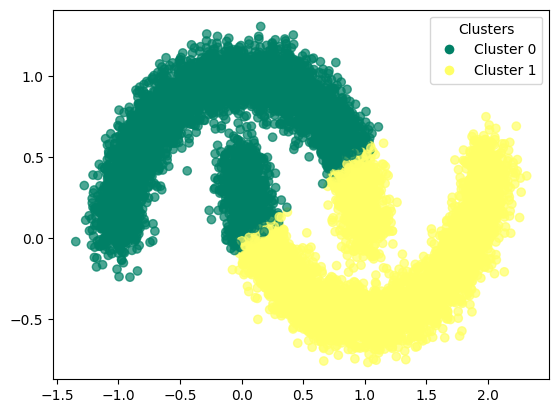

In [101]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [102]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.8448
accuracy after: 0.8448


In [103]:
df_pca_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_pca
0,0.455493,-0.125503,0.038190,0.055688,-0.021515,-0.125640,-0.035053,-0.041168,-0.129623,-0.149328,1,1,1
1,-0.704217,0.041308,0.104097,0.096566,-0.151889,0.011416,-0.066270,0.075509,-0.008285,-0.023126,0,0,0
2,0.413799,0.791322,-0.055166,-0.022240,-0.136471,0.055090,0.067747,-0.133715,0.167076,0.026659,0,0,0
3,-0.864049,0.138754,0.033756,0.004952,-0.107315,0.065852,0.037587,0.069115,-0.180435,-0.203619,0,0,0
4,-0.936268,0.359267,0.012510,-0.043746,-0.176028,-0.007335,0.079860,0.006272,0.193863,0.072204,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.100828,-0.046548,-0.270553,0.011539,-0.120881,0.124382,0.043446,-0.131446,1,0,0
9996,0.052471,0.474023,-0.130659,-0.152188,0.018282,-0.060226,0.049418,-0.183995,-0.013695,0.019417,1,0,0
9997,-0.038031,0.245408,0.180198,-0.009502,0.023415,0.060556,-0.002431,0.202986,0.162574,-0.042126,1,0,0
9998,0.869802,0.523295,-0.064327,0.040480,-0.083759,0.045870,-0.039352,-0.080847,0.109214,0.011979,0,0,0


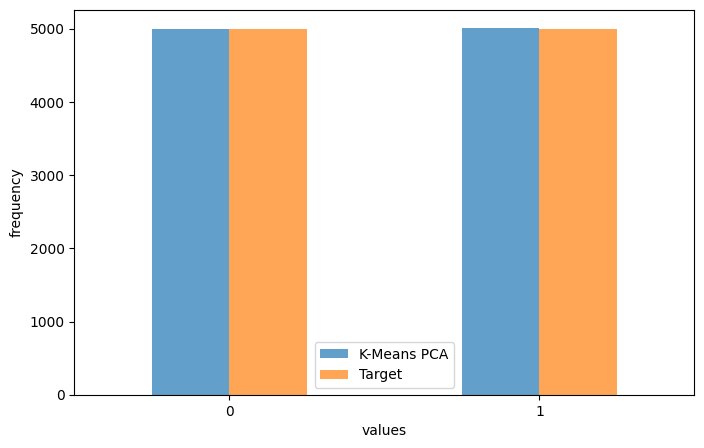

In [104]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [105]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[4220  780]
 [ 772 4228]]


In [106]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5000
           1       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [107]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5000
           1       0.84      0.85      0.84      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



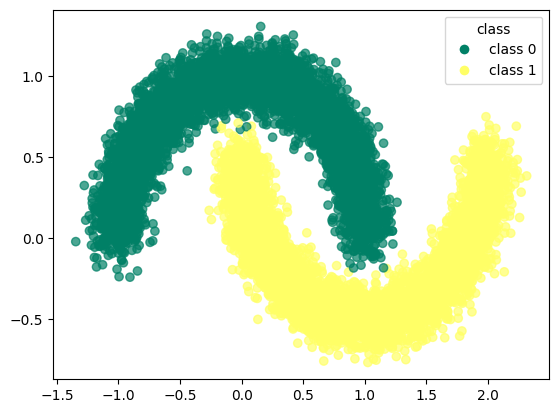

In [108]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

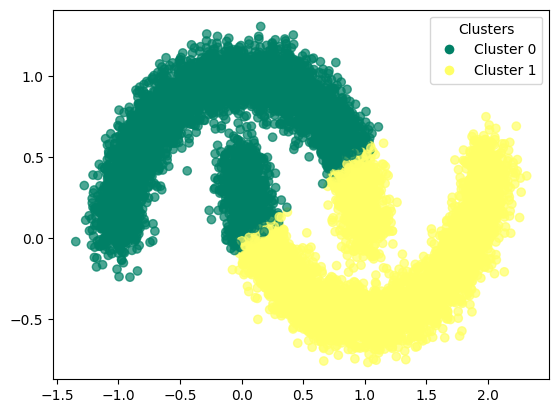

In [109]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

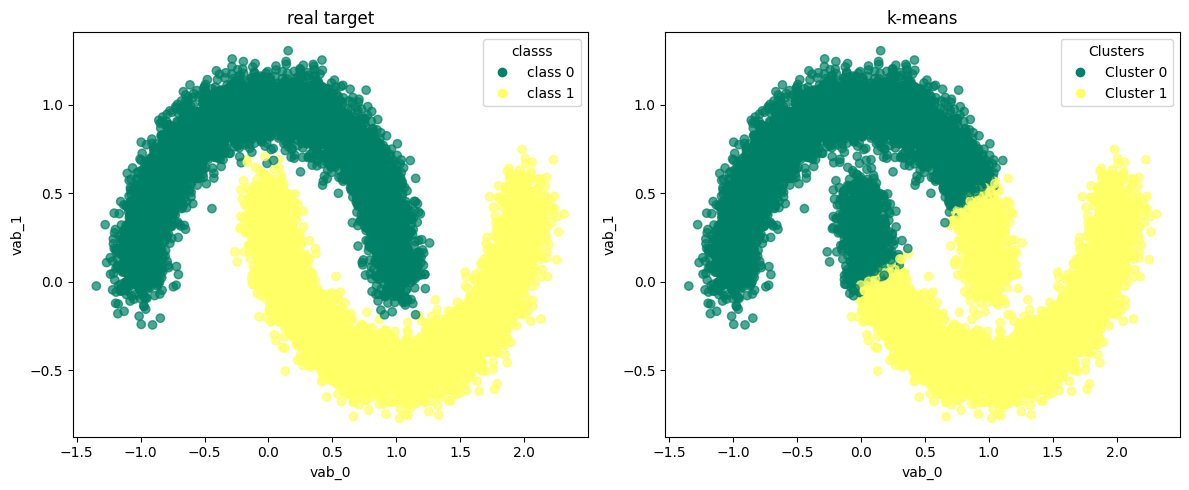

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

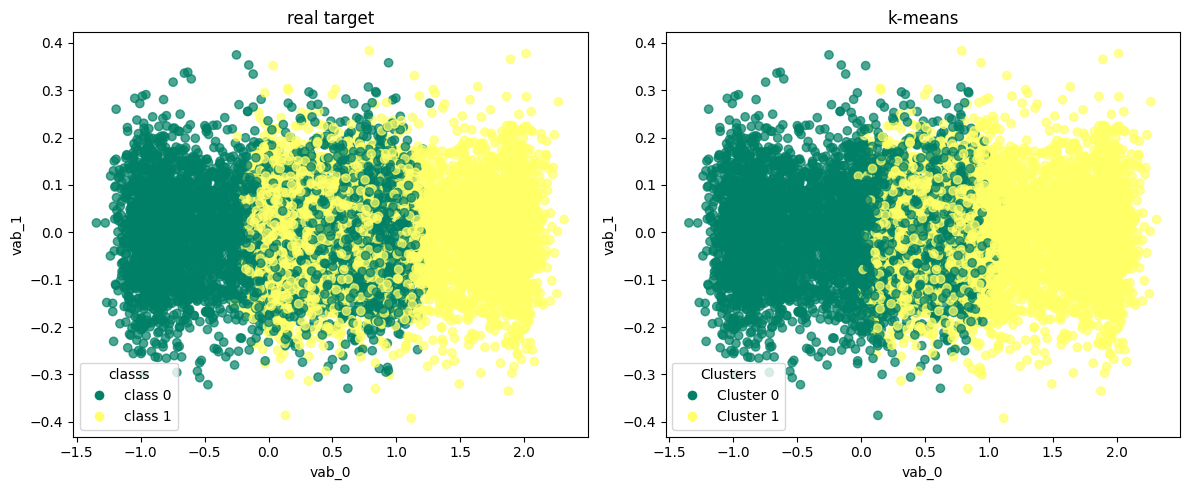

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

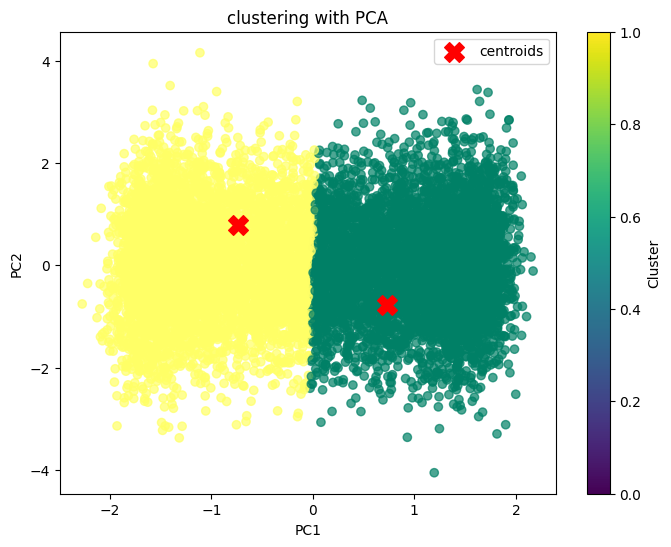

In [112]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

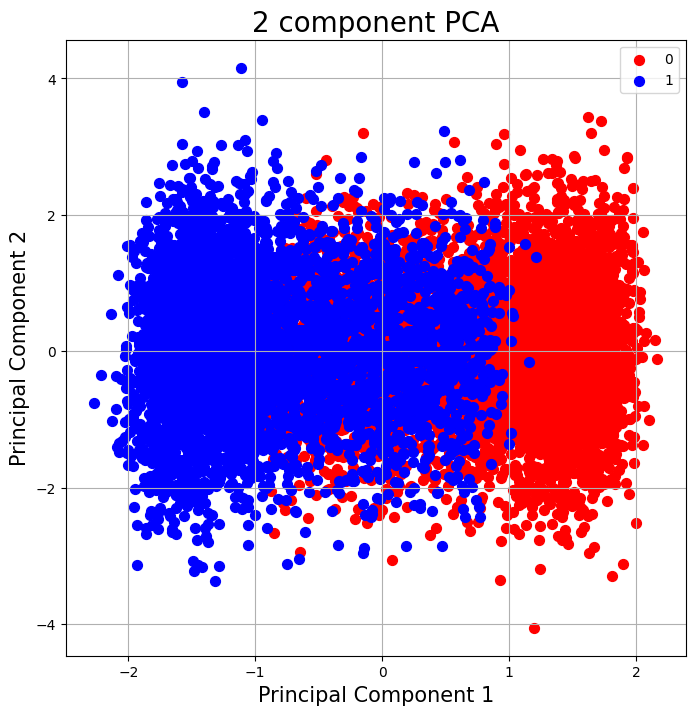

In [113]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### clustering with t-SNE

In [114]:
kmeans_tsne = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [115]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=2, random_state=42)

In [116]:
df_tsne_kmeans = df_moons.copy()

In [117]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [118]:
df_tsne_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_tsne
0,0.455493,-0.125503,0.038190,0.055688,-0.021515,-0.125640,-0.035053,-0.041168,-0.129623,-0.149328,1,1,0
1,-0.704217,0.041308,0.104097,0.096566,-0.151889,0.011416,-0.066270,0.075509,-0.008285,-0.023126,0,0,1
2,0.413799,0.791322,-0.055166,-0.022240,-0.136471,0.055090,0.067747,-0.133715,0.167076,0.026659,0,0,1
3,-0.864049,0.138754,0.033756,0.004952,-0.107315,0.065852,0.037587,0.069115,-0.180435,-0.203619,0,0,1
4,-0.936268,0.359267,0.012510,-0.043746,-0.176028,-0.007335,0.079860,0.006272,0.193863,0.072204,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.100828,-0.046548,-0.270553,0.011539,-0.120881,0.124382,0.043446,-0.131446,1,0,0
9996,0.052471,0.474023,-0.130659,-0.152188,0.018282,-0.060226,0.049418,-0.183995,-0.013695,0.019417,1,0,1
9997,-0.038031,0.245408,0.180198,-0.009502,0.023415,0.060556,-0.002431,0.202986,0.162574,-0.042126,1,0,0
9998,0.869802,0.523295,-0.064327,0.040480,-0.083759,0.045870,-0.039352,-0.080847,0.109214,0.011979,0,0,1


In [119]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.0945
accuracy after: 0.9055


In [120]:
df_tsne_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_tsne
0,0.455493,-0.125503,0.038190,0.055688,-0.021515,-0.125640,-0.035053,-0.041168,-0.129623,-0.149328,1,1,1
1,-0.704217,0.041308,0.104097,0.096566,-0.151889,0.011416,-0.066270,0.075509,-0.008285,-0.023126,0,0,0
2,0.413799,0.791322,-0.055166,-0.022240,-0.136471,0.055090,0.067747,-0.133715,0.167076,0.026659,0,0,0
3,-0.864049,0.138754,0.033756,0.004952,-0.107315,0.065852,0.037587,0.069115,-0.180435,-0.203619,0,0,0
4,-0.936268,0.359267,0.012510,-0.043746,-0.176028,-0.007335,0.079860,0.006272,0.193863,0.072204,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.100828,-0.046548,-0.270553,0.011539,-0.120881,0.124382,0.043446,-0.131446,1,0,1
9996,0.052471,0.474023,-0.130659,-0.152188,0.018282,-0.060226,0.049418,-0.183995,-0.013695,0.019417,1,0,0
9997,-0.038031,0.245408,0.180198,-0.009502,0.023415,0.060556,-0.002431,0.202986,0.162574,-0.042126,1,0,1
9998,0.869802,0.523295,-0.064327,0.040480,-0.083759,0.045870,-0.039352,-0.080847,0.109214,0.011979,0,0,0


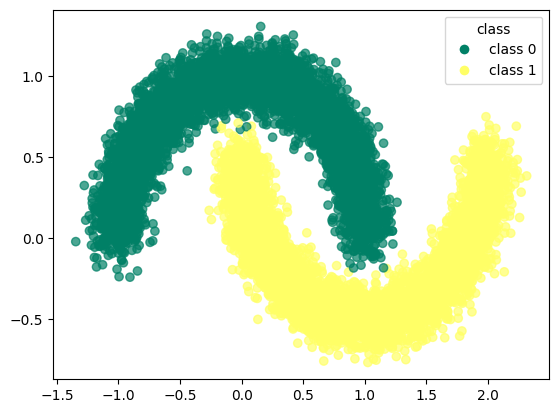

In [121]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

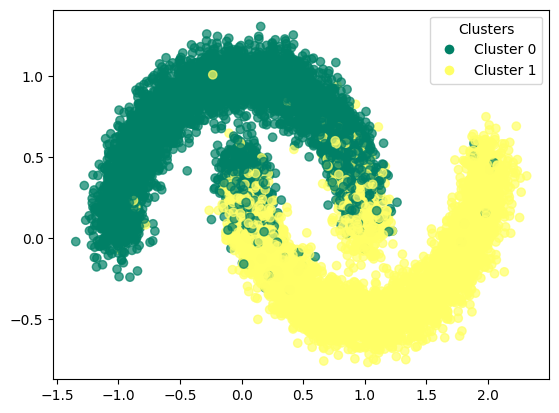

In [122]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

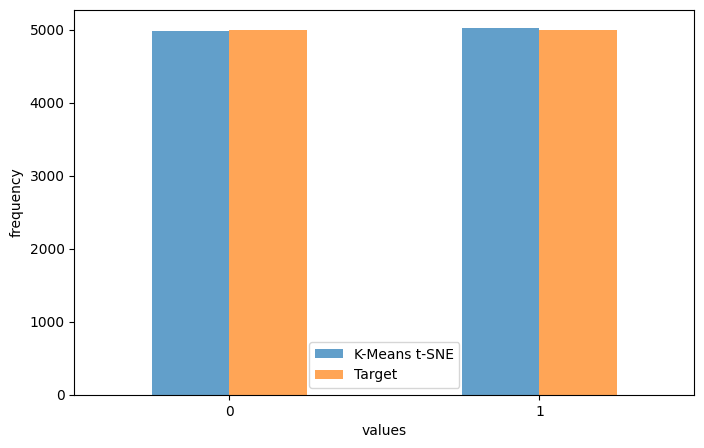

In [123]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar',figsize=(8, 5),alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [124]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[4517  483]
 [ 462 4538]]


In [125]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      5000
           1       0.90      0.91      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [126]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5000
           1       0.84      0.85      0.84      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [127]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5000
           1       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

